The objective here is to do exploratory data analysis and visualization of Air Quality Index based on given features of concentration of PM2.5 concentration, PM10 concentration, sulphur dioxide,nitrogen dioxide, respirable suspended particualte matter, suspended particulate matter, temperature, pressure, dew point, rain and classify the Air Quality as good, moderate, poor, unhealthy, healthy.

The data is combined(across the years and several stations across Beijing) and largely clean version of the Historical Daily Ambient Air Quality Data of years 2013-17.

The columns are:
No: row number    
year: year of data in this row
month: month of data in this row
day: day of data in this row
hour: hour of data in this row
PM2.5: PM2.5 concentration (ug/m^3)
PM10: PM10 concentration (ug/m^3)
SO2: SO2 concentration (ug/m^3)
NO2: NO2 concentration (ug/m^3)
CO: CO concentration (ug/m^3)
O3: O3 concentration (ug/m^3)
TEMP: temperature (degree Celsius)
PRES: pressure (hPa)
DEWP: dew point temperature (degree Celsius)
RAIN: precipitation (mm)
wd: wind direction
WSPM: wind speed (m/s)
station: name of the air-quality monitoring site

# Exploratory Data Analysis of Aotizhongxin Station

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('PRSA_Data_20130301-20170228\PRSA_Data_Aotizhongxin_20130301-20170228.csv') #import data

In [4]:
data.head(10) #print first 10 rows

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
5,6,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
6,7,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin
7,8,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin
8,9,2013,3,1,8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin
9,10,2013,3,1,9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin


In [5]:
data.tail(10) #printing last 10 rows

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35054,35055,2017,2,28,14,5.0,5.0,4.0,8.0,100.0,117.0,14.6,1013.3,-15.6,0.0,N,3.6,Aotizhongxin
35055,35056,2017,2,28,15,6.0,19.0,4.0,8.0,100.0,122.0,15.4,1013.0,-15.0,0.0,NNW,3.3,Aotizhongxin
35056,35057,2017,2,28,16,12.0,18.0,5.0,9.0,200.0,122.0,14.9,1012.6,-15.4,0.0,NW,2.1,Aotizhongxin
35057,35058,2017,2,28,17,12.0,23.0,6.0,13.0,200.0,120.0,14.2,1012.5,-14.9,0.0,NW,3.1,Aotizhongxin
35058,35059,2017,2,28,18,13.0,29.0,5.0,22.0,300.0,109.0,13.4,1013.0,-15.5,0.0,WNW,1.4,Aotizhongxin
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin
35063,35064,2017,2,28,23,19.0,31.0,10.0,79.0,600.0,42.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Aotizhongxin


In [6]:
data.columns #print the columns/features of the data

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [7]:
data.describe() #basic info of the dataset

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


## Data Shape (DIMENSION)


In [8]:
data.shape #dimensions of the data

(35064, 18)

## EXPLORATORY DATA ANALYSIS ON THE COMBINED DATASET FOR ALL STATIONS

### There are around 420768 data points in the dataset made by combining data from individual stations

We perform Data Analysis on this combined dataset Combined_Data-csv.csv

In [12]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
data = pd.read_csv('PRSA_Data_20130301-20170228\Combined_Data-csv.csv') #import data

In [12]:
data.head(10) #print first 10 rows

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1.0,0.0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1.0,1.0,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1.0,2.0,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1.0,3.0,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1.0,4.0,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong
5,6,2013,3,1.0,5.0,10.0,10.0,4.0,8.0,200.0,64.0,-1.6,1024.7,-21.1,0.0,NE,2.0,Wanshouxigong
6,7,2013,3,1.0,6.0,8.0,8.0,6.0,13.0,300.0,61.0,-2.4,1025.4,-20.3,0.0,NE,2.3,Wanshouxigong
7,8,2013,3,1.0,7.0,8.0,8.0,8.0,20.0,300.0,54.0,-0.8,1026.7,-19.9,0.0,NNE,2.0,Wanshouxigong
8,9,2013,3,1.0,8.0,3.0,6.0,9.0,23.0,300.0,50.0,0.4,1027.3,-19.4,0.0,NE,2.7,Wanshouxigong
9,10,2013,3,1.0,9.0,3.0,6.0,10.0,18.0,300.0,56.0,1.5,1027.4,-19.7,0.0,ENE,2.9,Wanshouxigong


In [13]:
data.tail(10) #printing last 10 rows

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
420758,420759,2017,2,28.0,14.0,6.0,14.0,2.0,7.0,200.0,96.0,14.5,1013.9,-12.7,0.0,NW,5.1,Shunyi
420759,420760,2017,2,28.0,15.0,6.0,14.0,2.0,8.0,200.0,97.0,15.3,1013.2,-13.0,0.0,WNW,4.2,Shunyi
420760,420761,2017,2,28.0,16.0,10.0,10.0,2.0,7.0,200.0,99.0,15.1,1012.9,-13.2,0.0,NW,3.3,Shunyi
420761,420762,2017,2,28.0,17.0,11.0,26.0,3.0,14.0,300.0,92.0,14.6,1013.0,-13.6,0.0,WNW,3.2,Shunyi
420762,420763,2017,2,28.0,18.0,15.0,35.0,6.0,39.0,500.0,67.0,12.6,1013.5,-11.9,0.0,WSW,1.3,Shunyi
420763,420764,2017,2,28.0,19.0,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi
420764,420765,2017,2,28.0,20.0,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi
420765,420766,2017,2,28.0,21.0,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi
420766,420767,2017,2,28.0,22.0,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,WNW,1.8,Shunyi
420767,420768,2017,2,28.0,23.0,15.0,22.0,13.0,34.0,500.0,60.0,7.4,1014.9,-11.9,0.0,N,1.4,Shunyi


In [14]:
data.columns #print the columns/features of the data

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [15]:
data.describe() #basic info of the dataset

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.00000,420768.000000,420768.000000,420768.000000,420768.000000,412779.000000,414872.000000,411960.000000,409803.000000,402589.000000,407930.000000,420390.000000,420395.000000,420385.000000,420398.000000,420464.000000
mean,210384.50000,2014.524013,6.229352,74.980975,20.008631,2617.582884,2874.364793,264.138983,353.327022,23458.257036,-109.656035,97.618492,772.400925,187.180591,0.059136,-15.922061
std,121465.40337,1.217152,3.442458,230.951099,33.691802,9741.118760,10660.470696,1000.877816,1178.470816,90166.198084,655.441765,326.810962,923.875995,717.192375,0.789176,68.369591
min,1.00000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,-9679.500000,-19.900000,-4721.266494,-43.400000,0.000000,-422.099603
25%,105192.75000,2013.000000,3.000000,9.000000,6.000000,23.000000,39.000000,3.000000,24.000000,500.000000,5.000000,4.000000,1000.000000,-7.900000,0.000000,0.800000
50%,210384.50000,2014.000000,6.000000,17.000000,13.000000,63.000000,91.000000,8.000000,47.000000,1000.000000,38.000000,16.500000,1008.700000,5.500000,0.000000,1.300000
75%,315576.25000,2016.000000,9.000000,25.000000,19.000000,136.000000,171.000000,26.000000,82.000000,1900.000000,78.000000,25.200000,1018.000000,17.200000,0.000000,2.100000
max,420768.00000,2017.000000,12.000000,1452.932329,216.624099,59955.089040,65788.708090,8079.721805,7528.392953,648993.391500,674.000000,2042.575594,1042.800000,4455.516930,72.500000,13.200000


## Data Shape (DIMENSION)


In [16]:
data.shape #dimensions of the data

(420768, 18)

## Visualization of Stations with Highest Pollutants

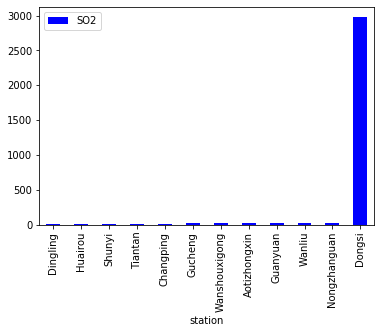

In [17]:
data[['SO2','station']].groupby(["station"]).mean().sort_values(by='SO2').head(20).plot.bar(color='b')
plt.show()

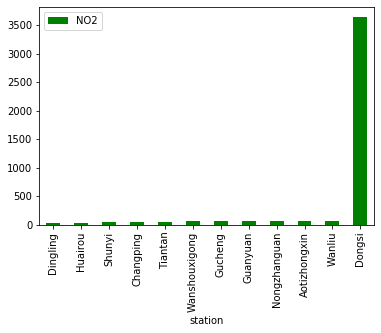

In [18]:
data[['NO2','station']].groupby(["station"]).mean().sort_values(by='NO2').plot.bar(color='g')
plt.show()

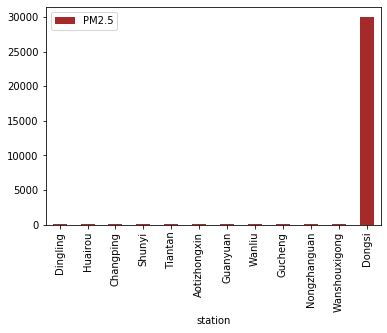

In [19]:
data[['PM2.5','station']].groupby(["station"]).mean().sort_values(by='PM2.5').plot.bar(color='brown')
plt.show()

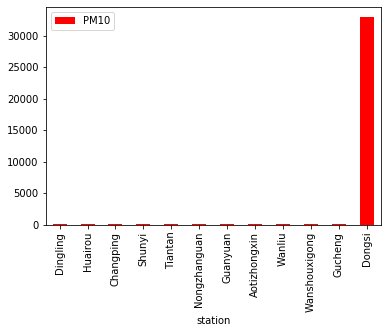

In [20]:
data[['PM10','station']].groupby(["station"]).mean().sort_values(by='PM10').plot.bar(color='r')
plt.show()

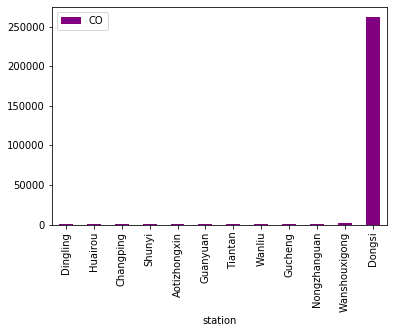

In [21]:
data[['CO','station']].groupby(["station"]).mean().sort_values(by='CO').plot.bar(color='purple')
plt.show()

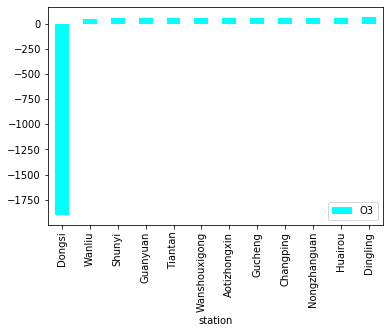

In [22]:
data[['O3','station']].groupby(["station"]).mean().sort_values(by='O3').plot.bar(color='cyan')
plt.show()

### Null Values Count

In [23]:
data.isna().sum() #print the sum of null values for each columns

No             0
year           0
month          0
day            0
hour           0
PM2.5       7989
PM10        5896
SO2         8808
NO2        10965
CO         18179
O3         12838
TEMP         378
PRES         373
DEWP         383
RAIN         370
wd          1744
WSPM         304
station        0
dtype: int64

There are no unnecessary columns to be dropped here.

### Calculate the total missing values and their percentage

In [24]:
total = data.isnull().sum().sort_values(ascending=False)

In [25]:
total.head()

CO       18179
O3       12838
NO2      10965
SO2       8808
PM2.5     7989
dtype: int64

We then calculate the percent of null values for each columns (sum of null values / total non-null value) *100


In [26]:
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)  #count(returns Non-NAN value)

In [27]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [28]:
missing_data.head()

,Total,Percent
CO,18179,4.320433
O3,12838,3.051088
NO2,10965,2.605949
SO2,8808,2.093315
PM2.5,7989,1.898671


### Percentage of Missing Values (Bar Plot)

Text(0.5, 1.0, 'Percent missing data by feature')

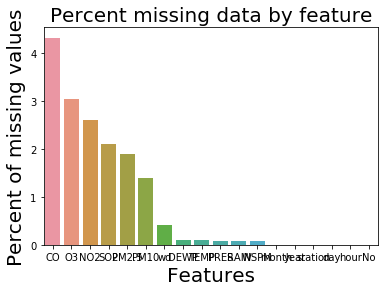

In [29]:
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=20)
plt.ylabel('Percent of missing values', fontsize=20)
plt.title('Percent missing data by feature', fontsize=20)

### MEAN DISTRIBUTION BY STATION

In [31]:
data.groupby('station')[['O3', 'CO','PM2.5','PM10','SO2','NO2']].mean()

,O3,CO,PM2.5,PM10,SO2,NO2
station,,,,,,
Aotizhongxin,56.353358,1262.945145,82.773611,110.060391,17.375901,59.305833
Changping,57.940003,1152.301345,71.099743,94.657871,14.958906,44.182086
Dingling,68.548371,904.896073,65.989497,83.739723,11.749650,27.585467
Dongsi,-1898.522484,261538.064845,29961.319588,32881.657818,2973.764531,3637.194746
Guanyuan,55.795044,1271.294377,82.933372,109.023303,17.590941,57.901643
Gucheng,57.694879,1323.974423,83.852089,118.861978,15.366162,55.871075
Huairou,59.824713,1022.554545,69.626367,91.482690,12.121553,32.497250
Nongzhanguan,58.534682,1324.350198,84.838483,108.991096,18.689242,58.097172
Shunyi,55.201321,1187.063979,79.491602,98.737026,13.572039,43.908865


### CHECKING DATA DISTRIBUTION


(array([3.08149e+05, 5.29950e+04, 1.18760e+04, 5.64000e+02, 1.30000e+01,
        5.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 10 Patch objects>)

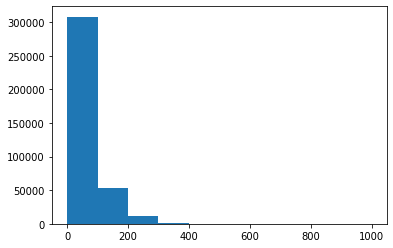

In [34]:
plt.hist(data.O3,range=(0.0,1000)) #O3

(array([3.5036e+05, 2.3516e+04, 3.8570e+03, 9.9600e+02, 3.6800e+02,
        3.2200e+02, 3.1100e+02, 3.0700e+02, 3.0600e+02, 3.1000e+02]),
 array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.]),
 <a list of 10 Patch objects>)

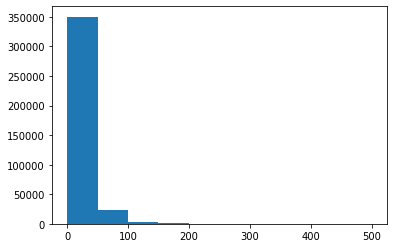

In [36]:
plt.hist(data.SO2,range=(0,500)) #SO2

(array([213298., 125431.,  32046.,   4930.,    814.,    389.,    356.,
           298.,    231.,    231.]),
 array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.]),
 <a list of 10 Patch objects>)

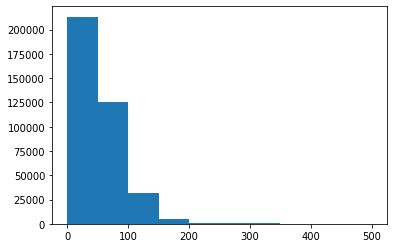

In [38]:
plt.hist(data.NO2,range=(0,500)) #NO2

(array([127120.,  94070.,  69038.,  40808.,  22261.,  12121.,   6484.,
          3516.,   1827.,   1126.]),
 array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.]),
 <a list of 10 Patch objects>)

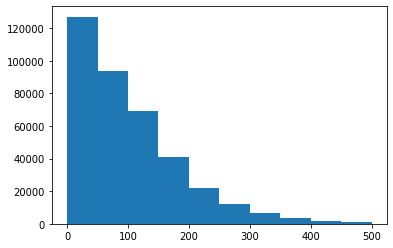

In [42]:
plt.hist(data.PM10,range=(0,500)) #PM10

### FILL MISSING VALUES BY MEAN (GROUP BY STATION)

In [44]:
grp_state = data.groupby('station')

In [47]:
def impute_mean_by_station(series):
    return series.fillna(series.mean())

In [48]:
data['PM2.5']=grp_state['PM2.5'].transform(impute_mean_by_station)  #fill value with mean value group by station
data['SO2']=grp_state['SO2'].transform(impute_mean_by_station)
data['NO2']=grp_state['NO2'].transform(impute_mean_by_station)
data['O3']=grp_state['O3'].transform(impute_mean_by_station)
data['CO']=grp_state['CO'].transform(impute_mean_by_station)
data['PM10']=grp_state['PM10'].transform(impute_mean_by_station)

In [49]:
data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.00000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420390.000000,420395.000000,420385.000000,420398.000000,420464.000000
mean,210384.50000,2014.524013,6.229352,74.980975,20.008631,2569.374010,2835.521970,262.090135,349.207928,22914.624732,-105.628525,97.618492,772.400925,187.180591,0.059136,-15.922061
std,121465.40337,1.217152,3.442458,230.951099,33.691802,9654.420566,10590.530737,994.920301,1168.953512,88825.232316,647.318085,326.810962,923.875995,717.192375,0.789176,68.369591
min,1.00000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,-9679.500000,-19.900000,-4721.266494,-43.400000,0.000000,-422.099603
25%,105192.75000,2013.000000,3.000000,9.000000,6.000000,23.000000,40.000000,3.000000,25.000000,500.000000,6.000000,4.000000,1000.000000,-7.900000,0.000000,0.800000
50%,210384.50000,2014.000000,6.000000,17.000000,13.000000,65.000000,92.000000,9.000000,47.000000,1000.000000,41.000000,16.500000,1008.700000,5.500000,0.000000,1.300000
75%,315576.25000,2016.000000,9.000000,25.000000,19.000000,133.000000,170.000000,25.000000,81.000000,1800.000000,76.000000,25.200000,1018.000000,17.200000,0.000000,2.100000
max,420768.00000,2017.000000,12.000000,1452.932329,216.624099,59955.089040,65788.708090,8079.721805,7528.392953,648993.391500,674.000000,2042.575594,1042.800000,4455.516930,72.500000,13.200000


In [51]:
data.isna().sum() #some null value remain since some state have one value(i.e NaN only) and no mean to replace them

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP        378
PRES        373
DEWP        383
RAIN        370
wd         1744
WSPM        304
station       0
dtype: int64

### Data Distribution after Replacing Null value with mean

(array([3.58718e+05, 2.35160e+04, 3.85700e+03, 9.96000e+02, 3.68000e+02,
        3.22000e+02, 3.11000e+02, 3.07000e+02, 3.06000e+02, 3.10000e+02]),
 array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450., 500.]),
 <a list of 10 Patch objects>)

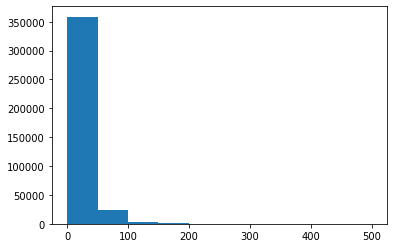

In [53]:
plt.hist(data.SO2,range=(0,500))

### Linear Regression Prediction

Using SO2, NO2, O3, PM10 TO PREDICT PM2.5 CONCENTRATION

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [15]:
X = data[['SO2','NO2','O3','PM10']]
y = data['PM2.5']
y.head()

0     9.0
1    11.0
2     8.0
3     8.0
4     8.0
Name: PM2.5, dtype: float64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=101)

In [17]:
X_train.head()

,SO2,NO2,O3,PM10
368803,50.0,44.0,154.0,186.0
218649,49.0,82.0,4.0,112.0
149333,24.0,2.0,89.0,21.0
377003,58.0,117.0,15.0,289.0
336789,2.0,67.0,33.0,95.0


In [18]:
LR = LinearRegression() 
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print('Intercept',LR.intercept_)

Intercept -14.995433450934797


In [20]:
print('Coefficients',LR.coef_)

Coefficients [ 0.00296904  0.00505548 -0.01526072  0.90989628]


In [21]:
predictions = LR.predict(X_test)

Text(0, 0.5, 'Predicted Y')

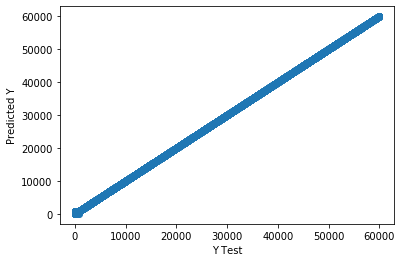

In [22]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [23]:
LR.score(X_test,y_test)

0.9999845247294245

In [25]:
print('R^2_Square:%.2f '% r2_score(y_test, predictions))
print('MSE:%.2f '% np.sqrt(mean_squared_error(y_test, predictions)))

R^2_Square:1.00 
MSE:38.02 


## Classification ot PM2.5 concentration

In [26]:
def PM25_range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

data['PM2.5_RANGE'] = data['PM2.5'] .apply(PM25_range)
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,PM2.5_RANGE
0,1,2013,3,1.0,0.0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong,Good
1,2,2013,3,1.0,1.0,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong,Good
2,3,2013,3,1.0,2.0,8.0,8.0,0.0,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong,Good
3,4,2013,3,1.0,3.0,8.0,8.0,3.0,16.0,0.0,0.0,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong,Good
4,5,2013,3,1.0,4.0,8.0,8.0,3.0,0.0,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong,Good


### 1. Logistic Regression

Using SO2, NO2, O3 and PM10 to estimate PM2.5

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
X2 = data[['SO2','NO2','O3','PM10']]
y2 = data['PM2.5_RANGE']

In [29]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [30]:
logmodel = LogisticRegression()
logmodel.fit(X_train2,y_train2)

C:\Users\Anshuman-Pati\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Anshuman-Pati\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Anshuman-Pati\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
predictions = logmodel.predict(X_test)

In [33]:
logmodel.score(X_test2,y_test2) #accuracy score 63.30%

0.6330174139743904

Creating new csv file to store PM2.5 range values inorder to cross verify predicted value

In [35]:
new = pd.DataFrame(data)
file1 = 'new1.csv'
new.to_csv(file1,index=True)

In [36]:
data.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,PM2.5_RANGE
420763,420764,2017,2,28.0,19.0,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi,Good
420764,420765,2017,2,28.0,20.0,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi,Good
420765,420766,2017,2,28.0,21.0,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi,Good
420766,420767,2017,2,28.0,22.0,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,WNW,1.8,Shunyi,Good
420767,420768,2017,2,28.0,23.0,15.0,22.0,13.0,34.0,500.0,60.0,7.4,1014.9,-11.9,0.0,N,1.4,Shunyi,Good


In [38]:
logmodel.predict([[77.4,147.7,78.182,100]]) #correct_prediction

array(['Poor'], dtype=object)

In [39]:
logmodel.predict([[32.7,35,78.182,203]]) #correct

array(['Moderate'], dtype=object)

In [40]:
logmodel.predict([[100,182.2,78.182,400]]) #correct

array(['Poor'], dtype=object)

## Using Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train2,y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
model.score(X_test2,y_test2) #higher accuracy score of 76.03%

0.760352600573264

In [46]:
X_train2.head()

,SO2,NO2,O3,PM10
359017,0.0,0.0,0.0000,256.0
392031,7.0,13.0,54.1926,18.0
282619,6.0,71.0,48.0000,112.0
365502,2.0,40.0,2.0000,46.0
241194,4.0,28.0,143.0000,49.0


In [47]:
model.predict([[2.0,40.0,2.0,46]]) #correct prediction

array(['Good'], dtype=object)

## Using Decision Tree Classifier


In [48]:
from sklearn import tree

In [49]:
model2 = tree.DecisionTreeClassifier()

In [50]:
model2.fit(X_train2,y_train2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [51]:
model2.score(X_test2,y_test2) #high accuracy score of 71.68%

0.7168896826882913

In [53]:
model2.predict([[2.0,40.0,2.0,46]]) # correct prediction

array(['Good'], dtype=object)